# Tutorial

Here we reproduce the LAN tutorial from official website: https://hddm.readthedocs.io/en/latest/lan_tutorial.html#tutorial


Please check the website for details instructions


## Section 0: Colab Prep (not neccessary in this docker image)

### imports

In [1]:
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm

/home/hcp4715/miniconda3/envs/hddm097/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print("The current HDDM version is: ", hddm.__version__)

The current HDDM version is:  0.9.7


## Section 1: Model Info / Simulation / Basic Plotting

### 1.1 Access Meta-Data

In [3]:
# List the models currently available
hddm.model_config.model_config.keys()

dict_keys(['ddm_vanilla', 'full_ddm_vanilla', 'ddm', 'angle', 'weibull', 'levy', 'full_ddm', 'ornstein', 'ddm_sdv', 'gamma_drift', 'gamma_drift_angle', 'ds_conflict_drift', 'ds_conflict_drift_angle', 'ddm_par2', 'ddm_par2_no_bias', 'ddm_par2_angle_no_bias', 'ddm_par2_weibull_no_bias', 'ddm_seq2', 'ddm_seq2_no_bias', 'ddm_seq2_angle_no_bias', 'ddm_seq2_weibull_no_bias', 'ddm_mic2_adj', 'ddm_mic2_adj_no_bias', 'ddm_mic2_adj_angle_no_bias', 'ddm_mic2_adj_weibull_no_bias', 'tradeoff_no_bias', 'tradeoff_angle_no_bias', 'tradeoff_weibull_no_bias', 'tradeoff_gamma_conflict_no_bias', 'race_no_bias_3', 'race_no_bias_angle_3', 'race_no_bias_4', 'race_no_bias_angle_4', 'lca_no_bias_3', 'lca_no_bias_angle_3', 'lca_no_bias_4', 'lca_no_bias_angle_4', 'weibull_cdf', 'full_ddm2'])

#### NOTE

You find two kinds of extra models which were not mentioned in the model listing above:

    Experimental models, which eventually will be fully documented (or dropped)

    vanilla models are used predominantly with the basic HDDM() classes. These models are not to be used with the HDDMnn() classes.

#### Now taking a closer look at the angle model

In [4]:
# Metadata
model = 'ddm'
n_samples = 1000

In [5]:
# Config for our current model
hddm.model_config.model_config[model]

{'doc': 'Basic DDM. Meant for use with the LAN extension. \nNote that the boundaries here are coded as -a, and a in line with all other models meant for the LAN extension. \nTo compare model fits between standard HDDM and HDDMnn when using the DDM model, multiply the boundary (a) parameter by 2. \nWe recommend using standard HDDM if you are interested in the basic DDM, but you might want to use this for testing.',
 'params': ['v', 'a', 'z', 't'],
 'params_trans': [0, 0, 1, 0],
 'params_std_upper': [1.5, 1.0, None, 1.0],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.001], [3.0, 2.5, 0.9, 2.0]],
 'boundary': <function hddm.simulators.boundary_functions.constant(t=0)>,
 'params_default': [0.0, 1.0, 0.5, 0.001],
 'hddm_include': ['z'],
 'choices': [-1, 1],
 'slice_widths': {'v': 1.5,
  'v_std': 1,
  'a': 1,
  'a_std': 1,
  'z': 0.1,
  'z_trans': 0.2,
  't': 0.01,
  't_std': 0.15}}

In [6]:
# Looking at the doc string before using the model
print(hddm.model_config.model_config[model]['doc'])

Basic DDM. Meant for use with the LAN extension. 
Note that the boundaries here are coded as -a, and a in line with all other models meant for the LAN extension. 
To compare model fits between standard HDDM and HDDMnn when using the DDM model, multiply the boundary (a) parameter by 2. 
We recommend using standard HDDM if you are interested in the basic DDM, but you might want to use this for testing.


### 1.2 Generate Data

In [7]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

In [8]:
data

,rt,response,subj_idx,v,a,z,t
0,2.600194,1.0,0,-0.223663,1.009933,0.354029,0.888171
1,1.356168,0.0,0,-0.223663,1.009933,0.354029,0.888171
2,1.169170,1.0,0,-0.223663,1.009933,0.354029,0.888171
3,1.368168,0.0,0,-0.223663,1.009933,0.354029,0.888171
4,1.419167,0.0,0,-0.223663,1.009933,0.354029,0.888171
...,...,...,...,...,...,...,...
995,2.416186,1.0,0,-0.223663,1.009933,0.354029,0.888171
996,1.123171,0.0,0,-0.223663,1.009933,0.354029,0.888171
997,1.296169,1.0,0,-0.223663,1.009933,0.354029,0.888171
998,1.943164,0.0,0,-0.223663,1.009933,0.354029,0.888171


In [9]:
full_parameter_dict

{'a': 1.0099328020980731,
 't': 0.8881705095743659,
 'v': -0.22366266968597093,
 'z': 0.3540287287530549}

### 1.2 First Plot

subj_idx(0)


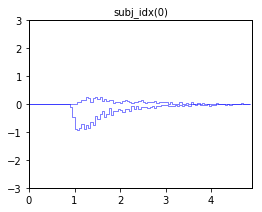

In [10]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': False})
plt.show()

subj_idx(0)


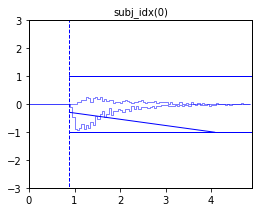

In [11]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

## Section 2: Single Subject (or collapsed) Data

In [12]:
# Metadata
nmcmc = 1500
model = 'angle'
n_samples = 1000
includes = hddm.model_config.model_config[model]['hddm_include']

In [13]:
# Generate some simulatred data
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [14]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,2.118799,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
1,2.120799,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
2,1.666803,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
3,1.975800,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
4,1.898801,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
...,...,...,...,...,...,...,...,...
995,1.618803,1.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
996,1.738803,1.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
997,1.921801,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192
998,1.737803,0.0,0,-1.106004,0.78154,0.503993,1.530803,0.524192


In [15]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.01,
                           w_outlier = 0.1,
                           model = model,)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [16]:
# Sample
hddmnn_model.sample(nmcmc,
                    burn = 500)

 [-----------------100%-----------------] 1500 of 1500 complete in 53.8 sec

### 2.1 Visualization

tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t
tracename: 
theta


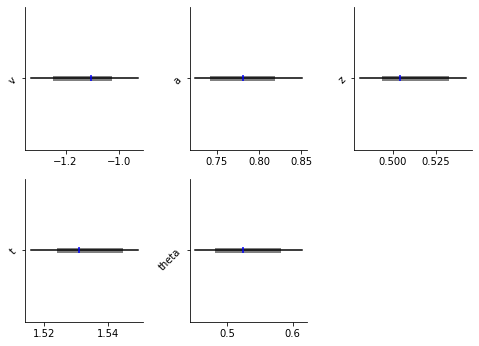

In [18]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

#### 2.1.1 Posterior Predictive (via `model cartoon plot`)

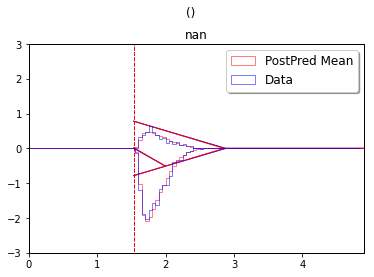

In [19]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'samples': 200})
plt.show()

**A small note on convergence:**

Plotting v
Plotting a
Plotting z
Plotting t
Plotting theta


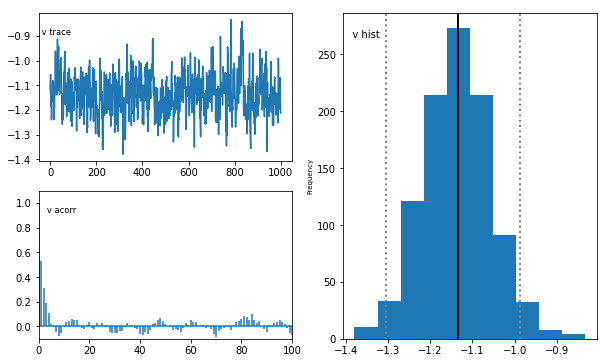

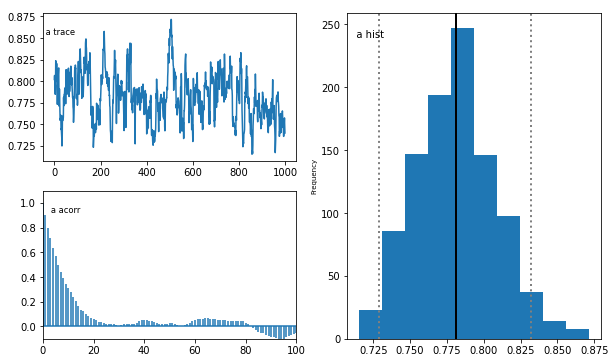

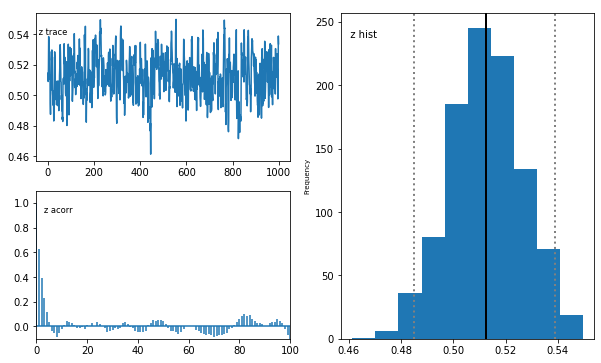

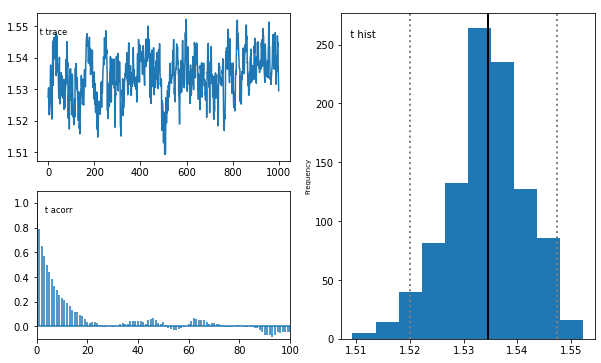

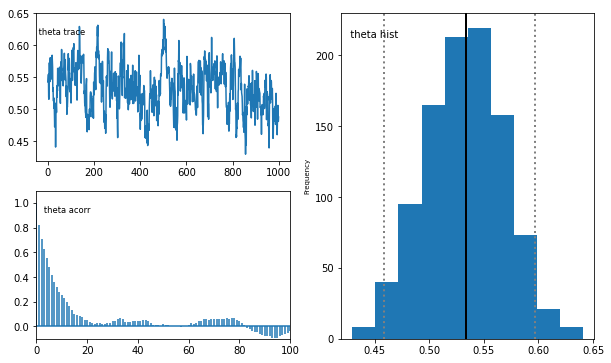

In [20]:
# TAKING A LOOK AT THE POSTERIOR TRACES
hddmnn_model.plot_posteriors(hddm.simulators.model_config[model]['params'])
plt.show()

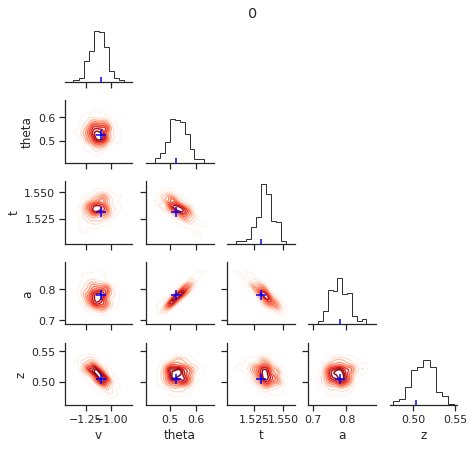

In [21]:
hddm.plotting.plot_posterior_pair(hddmnn_model, save = False,
                                  parameter_recovery_mode = True,
                                  samples = 500,
                                  figsize = (6, 6))

## Section 3: Hierarchical Models

In [22]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 200
n_subjects = 10

In [23]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = None,
                                                                                  n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [24]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           is_group_model = True,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [25]:
hddmnn_model.sample(nmcmc,
                    burn = 100) # if you want to save the model specify extra arguments --> dbname='traces.db', db='pickle'. # hddmnn_model.save('test_model')

 [-----------------100%-----------------] 1001 of 1000 complete in 850.3 sec

tracename: 
v
tracename: 
v_subj.0
tracename: 
v_subj.1
tracename: 
v_subj.2
tracename: 
v_subj.3
tracename: 
v_subj.4
tracename: 
v_subj.5
tracename: 
v_subj.6
tracename: 
v_subj.7
tracename: 
v_subj.8
tracename: 
v_subj.9
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
a_subj.5
tracename: 
a_subj.6
tracename: 
a_subj.7
tracename: 
a_subj.8
tracename: 
a_subj.9
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
z_subj.5
tracename: 
z_subj.6
tracename: 
z_subj.7
tracename: 
z_subj.8
tracename: 
z_subj.9
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracename: 
t_subj.2
tracename: 
t_subj.3
tracename: 
t_subj.4
tracename: 
t_subj.5
tracename: 
t_subj.6
tracename: 
t_subj.7
tracename: 
t_subj.8
tracename: 
t_subj.9
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 

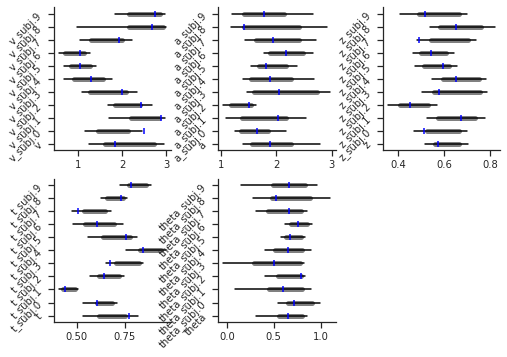

In [26]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

## Section 4: Parameter varies by Condition

In [27]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 500

# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}

# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [28]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = conditions,
                                                                                  depends_on = depends_on,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [29]:
# Let's check the resulting parameter vector
full_parameter_dict

{'t': 0.9071037445404897,
 'theta': 0.9539433466855959,
 'v': -1.2530372673201806,
 'z': 0.5898773750995014,
 'a(high)': 2.0559463966815,
 'a(low)': 1.4889499565427982,
 'a(medium)': 1.8806824193282414}

In [30]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = False,
                           depends_on = depends_on)


Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [31]:
# Sample
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1001 of 1000 complete in 102.1 sec

tracename: 
v
tracename: 
a(high)
tracename: 
a(low)
tracename: 
a(medium)
tracename: 
z
tracename: 
t
tracename: 
theta


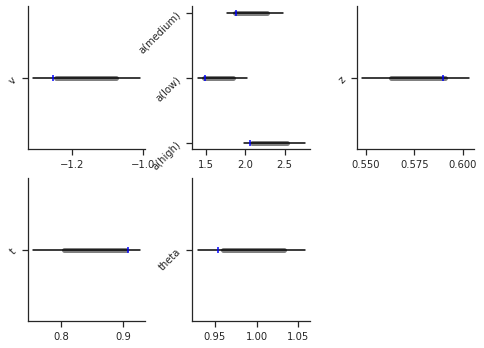

In [32]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

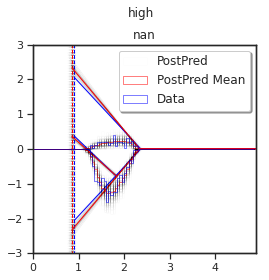

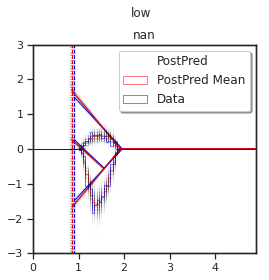

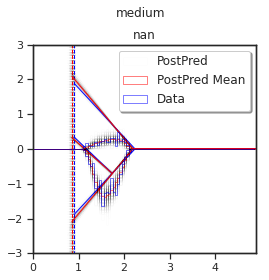

In [33]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200})
plt.show()

### 4.1 Combine hierarchical and condition data

In [34]:
# Metadata
nmcmc = 1500
model = 'angle'
n_subjects = 5
n_trials_per_subject = 500

In [35]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = {'c_one': ['low', 'medium', 'high']}, #, 'c_three': ['low', 'medium', 'high']},
                                                                                  depends_on = {'v': ['c_one']}, # 'theta': ['c_two']}, # 'theta': ['c_two']}, #regression_models = None, #
                                                                                  regression_models = None, #regression_covariates = None,
                                                                                  regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [36]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = True,
                           depends_on = {'v': 'c_one'})

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [37]:
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1500 of 1500 complete in 772.3 sec

tracename: 
v(high)
tracename: 
v(low)
tracename: 
v(medium)
tracename: 
v_subj(high).0
tracename: 
v_subj(high).1
tracename: 
v_subj(high).2
tracename: 
v_subj(high).3
tracename: 
v_subj(high).4
tracename: 
v_subj(low).0
tracename: 
v_subj(low).1
tracename: 
v_subj(low).2
tracename: 
v_subj(low).3
tracename: 
v_subj(low).4
tracename: 
v_subj(medium).0
tracename: 
v_subj(medium).1
tracename: 
v_subj(medium).2
tracename: 
v_subj(medium).3
tracename: 
v_subj(medium).4
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracename: 
t_subj.2
tracename: 
t_subj.3
tracename: 
t_subj.4
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 
theta_subj.3
tracename: 
theta_subj.4


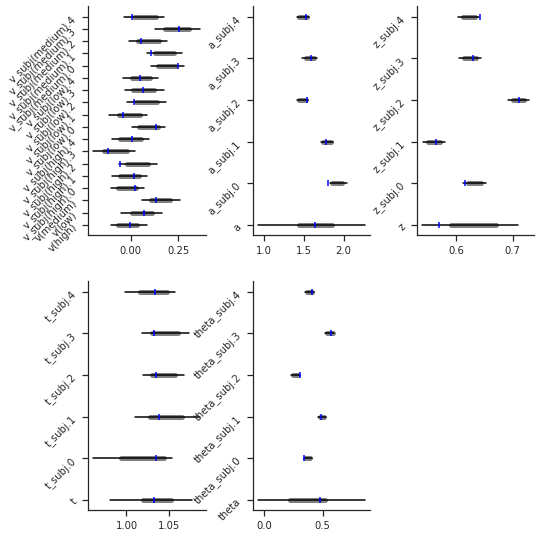

In [38]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

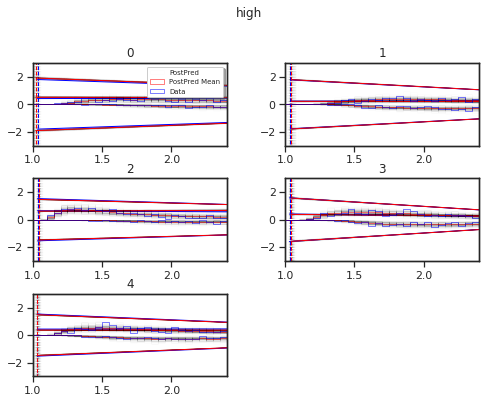

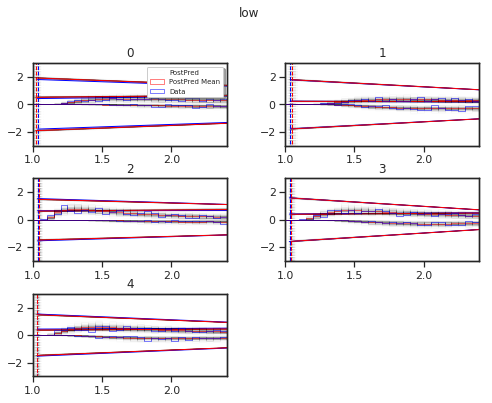

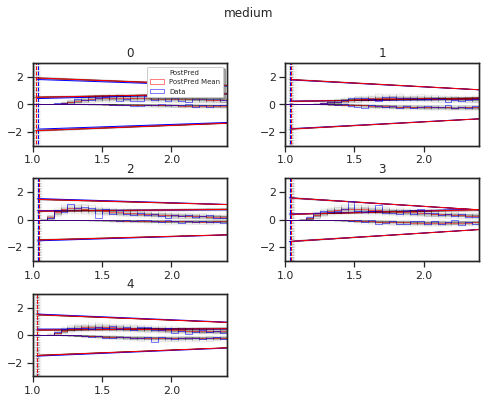

In [39]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(1, 2.5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200,
                                        'legend_fontsize': 7})
plt.show()

## Section 5: Regressors
This section provides a simple working example using the Neural Networks with the Regression backend. The regression back-end allows linking parameters to trial-by-trial covariates via a (general) linear model.

In [40]:
# Metadata
nmcmc = 200
model = 'angle'
n_samples_by_subject = 500

In [41]:
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 3,
                                                                                  n_samples_by_subject = n_samples_by_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = ['t ~ 1 + covariate_name', 'v ~ 1 + covariate_name'],
                                                                                  regression_covariates = {'covariate_name': {'type': 'continuous', 'range': (0, 1)}},
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [42]:
# Set up the regressor a regressor:
reg_model_v = {'model': 'v ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_model_t = {'model': 't ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_descr = [reg_model_t, reg_model_v]


In [43]:
# Make HDDM model
hddmnn_reg = hddm.HDDMnnRegressor(data,
                                  reg_descr,
                                  include = hddm.simulators.model_config[model]['hddm_include'],
                                  model = model,
                                  informative = False,
                                  p_outlier = 0.0)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [44]:
# Sample
hddmnn_reg.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 201 of 200 complete in 50.2 sec

tracename: 
v_Intercept
tracename: 
v_Intercept_subj.0
tracename: 
v_Intercept_subj.1
tracename: 
v_Intercept_subj.2
tracename: 
v_covariate_name
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
t_Intercept
tracename: 
t_Intercept_subj.0
tracename: 
t_Intercept_subj.1
tracename: 
t_Intercept_subj.2
tracename: 
t_covariate_name
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2


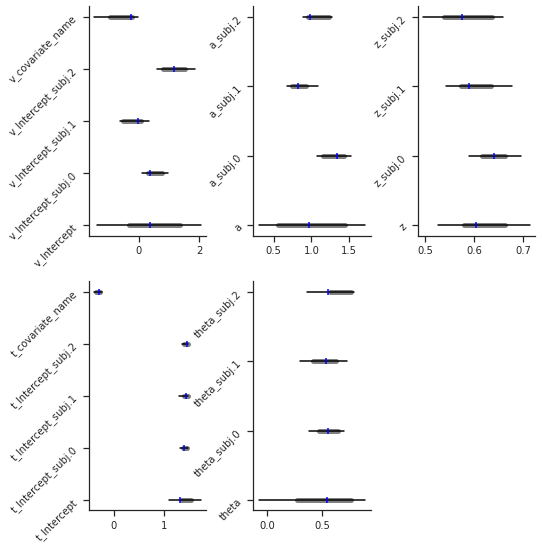

In [45]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_reg,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

## Section 6: Stim Coding

In [46]:
# Metadata
nmcmc = 300
model = 'ddm'
n_samples_by_condition = 500
split_param = 'v'

In [47]:
sim_data_stimcoding, parameter_dict = hddm.simulators.simulator_stimcoding(model = model,
                                                                           split_by = split_param,
                                                                           drift_criterion = 0.3,
                                                                           n_trials_per_condition = 500)

In [48]:
sim_data_stimcoding

,rt,response,stim,v,a,z,t,subj_idx
0,1.193545,0,1,-0.547316,0.609754,0.471043,0.203554,none
1,0.444554,0,1,-0.547316,0.609754,0.471043,0.203554,none
2,0.391554,0,1,-0.547316,0.609754,0.471043,0.203554,none
3,1.240546,0,1,-0.547316,0.609754,0.471043,0.203554,none
4,0.755550,1,1,-0.547316,0.609754,0.471043,0.203554,none
...,...,...,...,...,...,...,...,...
495,0.591553,1,2,1.147316,0.609754,0.471043,0.203554,none
496,0.875549,1,2,1.147316,0.609754,0.471043,0.203554,none
497,0.479554,1,2,1.147316,0.609754,0.471043,0.203554,none
498,0.413554,1,2,1.147316,0.609754,0.471043,0.203554,none


In [49]:
parameter_dict

{'v': 0.8473163558991539,
 'a': 0.6097539582846098,
 'z': 0.4710428978698674,
 't': 0.20355399084459563,
 'dc': 0.3}

In [50]:
hddmnn_model = hddm.HDDMnnStimCoding(sim_data_stimcoding,
                                     include = hddm.simulators.model_config[model]['hddm_include'],
                                     model = model,
                                     stim_col = 'stim',
                                     p_outlier = 0.0,
                                     split_param = split_param,
                                     informative = False,
                                     drift_criterion = True)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [51]:
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 300 of 300 complete in 11.4 sec

In [52]:
hddmnn_model.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,0.944738,0.05821,0.836372,0.910347,0.94579,0.987671,1.045721,0.00427
a,0.6001,0.009746,0.580468,0.593607,0.600739,0.606838,0.619294,0.000812
z,0.485118,0.011015,0.463107,0.47851,0.485567,0.493031,0.507183,0.000926
t,0.21134,0.003288,0.204618,0.209579,0.211353,0.213471,0.217916,0.00027
dc,0.294617,0.069297,0.160683,0.250193,0.291985,0.346801,0.420947,0.005628


tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t
tracename: 
dc


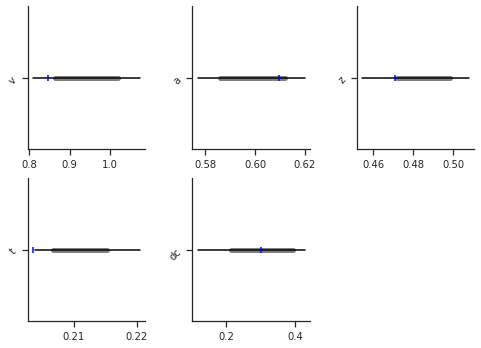

In [53]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

## Section 7: Model Recovery

In [54]:
# Metadata
model = 'weibull'
n_samples = 300

In [55]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_samples_by_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [56]:
data

,rt,response,subj_idx,v,a,z,t,alpha,beta
0,1.766491,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
1,1.567491,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
2,1.594491,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
3,1.870496,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
4,1.620491,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
...,...,...,...,...,...,...,...,...,...
95,3.003516,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
96,4.094437,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
97,1.886497,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264
98,2.438522,0.0,0,-1.043997,1.909557,0.477758,0.732499,2.673554,3.814264


In [57]:
# Now we fit for each model:
hddmnn_model_weibull = hddm.HDDMnn(data,
                                   informative = False,
                                   model = 'weibull',
                                   p_outlier = 0.0,
                                   include = hddm.simulators.model_config['weibull_cdf']['hddm_include'],
                                   is_group_model = False)

hddmnn_model_angle = hddm.HDDMnn(data,
                                 model = 'angle',
                                 informative = False,
                                 p_outlier = 0.0,
                                 include = hddm.simulators.model_config['angle']['hddm_include'],
                                 is_group_model = False)

hddmnn_model_ddm = hddm.HDDMnn(data,
                               informative = False,
                               model = 'ddm',
                               p_outlier = 0.0,
                               include = hddm.simulators.model_config['ddm']['hddm_include'],
                               is_group_model = False)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [58]:
nmcmc = 1000
hddmnn_model_weibull.sample(nmcmc,
                            burn = 200)

hddmnn_model_angle.sample(nmcmc,
                          burn = 200)

hddmnn_model_ddm.sample(nmcmc,
                        burn = 200)

 [-----------------100%-----------------] 1000 of 1000 complete in 14.7 sec

### 7.1 Checking Model Fits Visually
Posterior Predictive: Do the ‘Posterior Models’ also make sense?

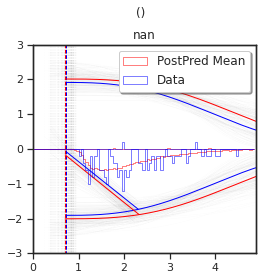

In [59]:
# WEIBULL
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_weibull,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

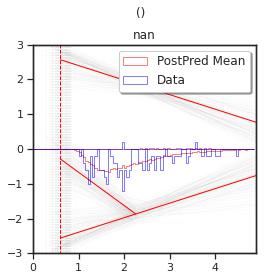

In [60]:
# ANGLE
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_angle,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

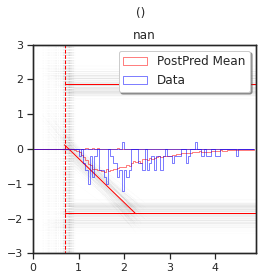

In [61]:
# DDM
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_ddm,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()


### 7.2 Comparing DIC’s

In [62]:
hddmnn_model_weibull.dic

236.537099609375

In [63]:
hddmnn_model_angle.dic

233.95331573486328

In [64]:
hddmnn_model_ddm.dic

241.53893619537354

## Section 8: Real Data!

In [65]:
# Metadata
nmcmc = 1000
burn = 500
model = 'angle'

### 8.1 Load and Pre-process dataset

In [66]:
# Load one of the datasets shipping with HDDM
cav_data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')

In [67]:
cav_data

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
...,...,...,...,...,...,...,...
3983,13,LL,1.450,0.0,-1.237166,0,HC
3984,13,WL,0.711,1.0,-0.377450,0,LC
3985,13,WL,0.784,1.0,-0.694194,0,LC
3986,13,LL,2.350,0.0,-0.546536,0,HC


### 8.2 Basic Condition Split Model

In [68]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               p_outlier = 0.05,
                               is_group_model = False,
                               depends_on = {'v': 'stim'})

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [69]:
hddmnn_model_cav.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 1000 of 1000 complete in 168.0 sec

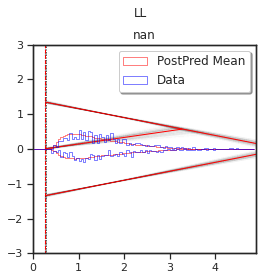

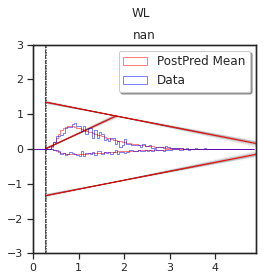

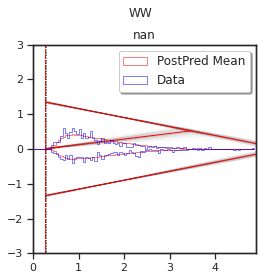

In [70]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_cav,
                                        columns = 1,
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

### 8.3 Basic Hierarchical Model

In [71]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               is_group_model = True,
                               p_outlier = 0.05)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [72]:
hddmnn_model_cav.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 1001 of 1000 complete in 871.9 sec

tracename: 
v
tracename: 
v_subj.0
tracename: 
v_subj.1
tracename: 
v_subj.2
tracename: 
v_subj.3
tracename: 
v_subj.4
tracename: 
v_subj.5
tracename: 
v_subj.6
tracename: 
v_subj.7
tracename: 
v_subj.8
tracename: 
v_subj.9
tracename: 
v_subj.10
tracename: 
v_subj.11
tracename: 
v_subj.12
tracename: 
v_subj.13
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
a_subj.5
tracename: 
a_subj.6
tracename: 
a_subj.7
tracename: 
a_subj.8
tracename: 
a_subj.9
tracename: 
a_subj.10
tracename: 
a_subj.11
tracename: 
a_subj.12
tracename: 
a_subj.13
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
z_subj.5
tracename: 
z_subj.6
tracename: 
z_subj.7
tracename: 
z_subj.8
tracename: 
z_subj.9
tracename: 
z_subj.10
tracename: 
z_subj.11
tracename: 
z_subj.12
tracename: 
z_subj.13
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracenam

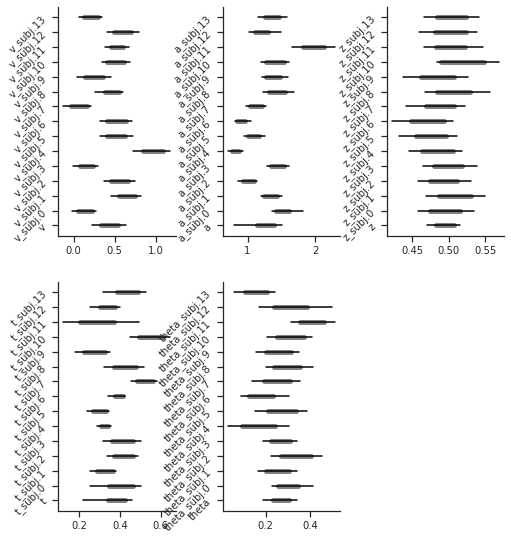

In [73]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model_cav,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

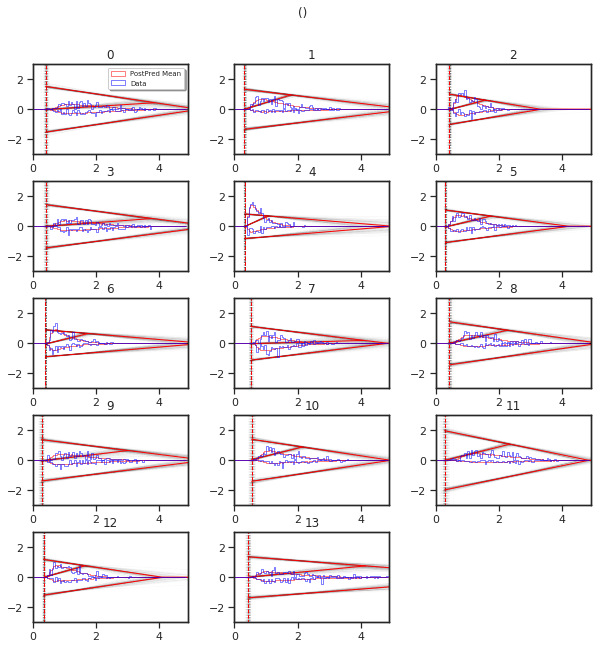

In [74]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_cav,
                                        columns = 3,
                                        figsize = (10, 10),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200,
                                        'legend_fontsize': 7,
                                        'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3}})
plt.show()

### Note
This is just an example. The angle model might not be the best choice here, and we are moreover ignoring the supplied conditions.

## Section 9: Accessing the Neural Network Directly

### 9.1 Direct access to batch predictions

In [75]:
model = 'angle'

In [76]:
lan_angle = hddm.network_inspectors.get_torch_mlp(model = model)

Let’s predict some likelihoods !

In [77]:
# Make some random parameter set
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 1)
parameter_matrix = np.tile(np.squeeze(parameter_df.values), (200, 1))

# Initialize network input
network_input = np.zeros((parameter_matrix.shape[0], parameter_matrix.shape[1] + 2)) # Note the + 2 on the right --> we append the parameter vectors with reaction times (+1 columns) and choices (+1 columns)

# Add reaction times
network_input[:, -2] = np.linspace(0, 3, parameter_matrix.shape[0])

# Add choices
network_input[:, -1] = np.repeat(np.random.choice([-1, 1]), parameter_matrix.shape[0])

# Convert to float
network_input = network_input.astype(np.float32)
# Show example output
print(lan_angle(network_input)[:10]) # printing the first 10 outputs
print(lan_angle(network_input).shape) # original shape of output

[[-1.6301372 ]
 [ 1.4697113 ]
 [ 1.3025035 ]
 [ 0.6531869 ]
 [-0.14898753]
 [-0.90749913]
 [-1.5180254 ]
 [-2.0751839 ]
 [-2.5995152 ]
 [-3.0728953 ]]
(200, 1)


### 9.2 Plotting Utilities

HDDM provides two plotting function to investigate the network outputs directly. The `kde_vs_lan_likelihoods()` plot and the `lan_manifold()` plot.

#### 9.2.1 `kde_vs_lan_likelihoods()`
The `kde_vs_lan_likelihoods()` plot allows you to check the likelihoods produced by a LAN against Kernel Density Estimates (KDEs) from model simulations. You can supply a panda `DataFrame` that holds parameter vectors as rows.

In [78]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 10)


In [79]:
parameter_df

,v,a,z,t,theta
0,-1.428008,0.468989,0.628404,1.011916,1.014070
1,-1.709718,2.867164,0.267196,1.655979,0.746221
2,-0.228811,2.411378,0.135059,0.919035,0.876666
3,-1.439500,1.034234,0.280577,1.828303,1.010780
4,1.446826,2.385301,0.435046,1.583812,0.993907
5,-1.845934,1.893493,0.816789,1.976738,1.118446
6,-2.991487,2.646097,0.584867,1.351326,0.318365
7,-0.343069,0.855507,0.385555,0.699210,0.089315
8,2.835597,2.264498,0.885545,1.949255,0.999632
9,2.982951,1.644682,0.181867,0.129466,0.083849


1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


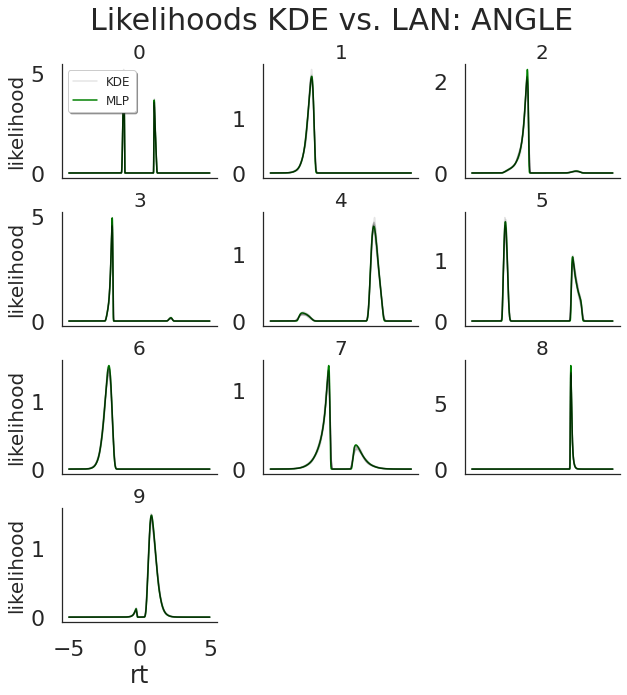

In [80]:
hddm.network_inspectors.kde_vs_lan_likelihoods(parameter_df = parameter_df,
                                               model = model,
                                               cols = 3,
                                               n_samples = 2000,
                                               n_reps = 10,
                                               show = True)

#### 9.2.2 `lan_manifold()`

In [81]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 1)


In [82]:
parameter_df

,v,a,z,t,theta
0,2.171244,2.869671,0.719455,0.124116,0.595309


Using only the first row of the supplied parameter array !


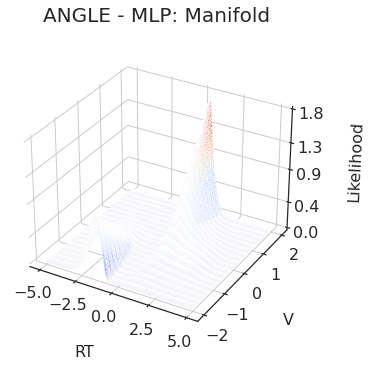

In [83]:
# Now plotting
hddm.network_inspectors.lan_manifold(parameter_df = parameter_df,
                                     vary_dict = {'v': np.linspace(-2, 2, 20)},
                                     model = model,
                                     n_rt_steps = 300,
                                     fig_scale = 1.0,
                                     max_rt = 5,
                                     save = True,
                                     show = True)
